# Newton's first interpolation formula (Newton's formula at the beginning of the table)

_Last update:_ 28.07.2021

## Importing modules

In [7]:
import numpy as np                             # for working with matricies and vectors
import matplotlib.pyplot as plt                # for drawing graphs
import sympy as sp                             # for beautiful display of intermediate results
from math import factorial                     # to find the factorial
import functools                               # some functional programming
from IPython.display import Markdown, display  # for beautiful text output

%matplotlib inline

In [8]:
plt.style.use('seaborn-poster')  # graph style

## Input data

In [9]:
def f(x):
    return np.log(x) + np.sqrt(1+x)

In [10]:
x_d = sp.Symbol('x')
display(Markdown(f"<text style=font-size:16px;font-family:serif>f(x) = </text> {sp.latex(sp.log(x_d) + sp.sqrt(1+x_d), mode='inline')}"))

<text style=font-size:16px;font-family:serif>f(x) = </text> $\sqrt{x + 1} + \log{\left(x \right)}$

In [11]:
h = 2.5
x_0 = 1
x_1 = 17

In [12]:
x = np.arange(x_0, x_1, h)
y = f(x)
display(Markdown(f"<text style=font-size:16px;font-family:serif>x = {list(x)}<br>f(x) = {list(y)} </text>"))

<text style=font-size:16px;font-family:serif>x = [1.0, 3.5, 6.0, 8.5, 11.0, 13.5, 16.0]<br>f(x) = [1.4142135623730951, 3.3740833120550104, 4.437510780292646, 5.222273164980759, 5.861996887936125, 6.410576238376338, 6.895694347857441] </text>

## Finding finite differences

In [13]:
def finite_differences(y: np.array) -> np.matrix:
    ''' finite_differences - compiles a finite difference table
        
        Arguments:
            * y: np.array - list of values `f(x)`
        
        Return:
            np.matrix - finite difference table
    '''
    
    n = len(y)               # length of list f(x)
    coef = np.zeros([n, n])  # fill the matrix of finite differences with zeros 
    coef[:, 0] = y           # let the first column be f(x)
    for j in range(1, n):    # iterate from the second column
        for i in range(n-j): 
            coef[i][j] = coef[i+1][j-1]-coef[i][j-1]  # by the formula we find all finite differences
    return coef

In [14]:
a = finite_differences(y)
sp.Matrix(a)

Matrix([
[ 1.4142135623731,  1.95986974968192,   -0.89644228144428,  0.617777197894757,  -0.484150776077982,  0.404418643478801, -0.350897668541171],
[3.37408331205501,  1.06342746823764,  -0.278665083549523,  0.133626421816775, -0.0797321325991809, 0.0535209749376295,                0.0],
[4.43751078029265, 0.784762384688113,  -0.145038661732747, 0.0538942892175944, -0.0262111576615514,                0.0,                0.0],
[5.22227316498076, 0.639723722955366, -0.0911443725151528, 0.0276831315560431,                 0.0,                0.0,                0.0],
[5.86199688793613, 0.548579350440213, -0.0634612409591098,                0.0,                 0.0,                0.0,                0.0],
[6.41057623837634, 0.485118109481103,                 0.0,                0.0,                 0.0,                0.0,                0.0],
[6.89569434785744,               0.0,                 0.0,                0.0,                 0.0,                0.0,                0.0]])

## Interpolation

### Polynomial output

In [15]:
def newton_function(x: np.array, y: np.array, *, var: bool = False) -> None:
    ''' newton_function(x: np.array, y: np.array, *, var: bool = False) - displays the interpolation polynomial
        
        Arguments:
            * x: np.array - list of values `x`
            * y: np.array - list of values `f(x)`
            ** var: bool - determines from which argument will be a polynomial in `x` or from` q`
                True - `x`
                False - `q`, where` q` = (x - x_0) / h
                
        Return:
            None - but prints the interpolation polynomial to the screen
    '''
    
    coef = finite_differences(y)                    # finite difference table
    q = f'(x-{x[0]})/{x[1]-x[0]}' if var else 'q'   # determine what argument the polynomial will have
    arg = 'x' if var else 'q'
    variables = [list(map(lambda x: f'({q} - {x})', np.arange(0, i))) for i in range(len(y))]  # we find the arguments for the coefficients
    lst = []  # list with terms
    for i in range(len(variables)):
        if len(variables[i]) > 0:  # if we have an argument in the addend
            lst.append(str(coef[0, i]) + '*' + functools.reduce((lambda x, y: f'{x}*{y}'), variables[i]) + '/' + str(factorial(i)))  # True: we calculate the term
        else:
            lst.append(str(coef[0, i]))  # False: add coefficient
    expression = functools.reduce((lambda x, y: f'{x} + {y}'), lst)  # get our expression
    display(Markdown(f"<text style=font-size:18px;font-family:serif>P({arg}) = </text> {sp.latex(sp.simplify(expression), mode='inline')}"))  # take it out

In [16]:
newton_function(x, y)

<text style=font-size:18px;font-family:serif>P(q) = </text> $- 0.00048735787297384903 q^{6} + 0.010680523456931076 q^{5} - 0.095299921829259811 q^{4} + 0.45161151943572122 q^{3} - 1.2810560040162616 q^{2} + 2.8744209905077583 q + 1.4142135623730951$

In [17]:
newton_function(x, y, var=True)

<text style=font-size:18px;font-family:serif>P(x) = </text> $- 1.9962178477008866 \cdot 10^{-6} x^{6} + 0.00012134586728517958 x^{5} - 0.0030164640675394364 x^{4} + 0.039795459198146133 x^{3} - 0.30744006923693995 x^{2} + 1.6567332613233629 x + 0.028022025506627992$

### Interpolation process

In [18]:
def newton_interpolation(x: float, x_data: np.array, y: np.array) -> float:
    ''' newton_interpolation(x: float, x_data: np.array, y: np.array) - find the value of the polynomial at the point `x`
    
        Arguments:
            * x: float - the point at which the polynomial value is sought
            * x_data: np.array - a list of initial values `x`
            * y: np.array - list of initial values `f (x)`
        
        Return:
            float - polynomial value at point `x`
    '''
    
    coefs = finite_differences(y)  # finite difference table
    h = x_data[1] - x_data[0]      # `h` - step
    q = (x - x_data[0])/h          # find `q`
    mul = 1
    s = 0
    for i in range(len(y)):
        mul = 1
        for j in range(i):
            mul *= q-j             # find the value of the argument at the point `x`
        s += coefs[0, i]*mul/factorial(i)  # find the sum of all terms
    return s

## Results

In [19]:
res = [newton_interpolation(i, x, y) for i in x]
comp_res = [np.isclose(res[i], y[i]) for i in range(len(res))]
display(Markdown(f"<text style=font-size:16px;font-family:serif>Result: {res}<br>Function values: {list(y)}<br>Comparing values at specified nodes: {comp_res} </text>"))

<text style=font-size:16px;font-family:serif>Result: [1.4142135623730951, 3.3740833120550104, 4.437510780292646, 5.222273164980759, 5.861996887936125, 6.41057623837634, 6.895694347857444]<br>Function values: [1.4142135623730951, 3.3740833120550104, 4.437510780292646, 5.222273164980759, 5.861996887936125, 6.410576238376338, 6.895694347857441]<br>Comparing values at specified nodes: [True, True, True, True, True, True, True] </text>

## Charts

In [20]:
newtonxs = newton_interpolation(x, x, y)

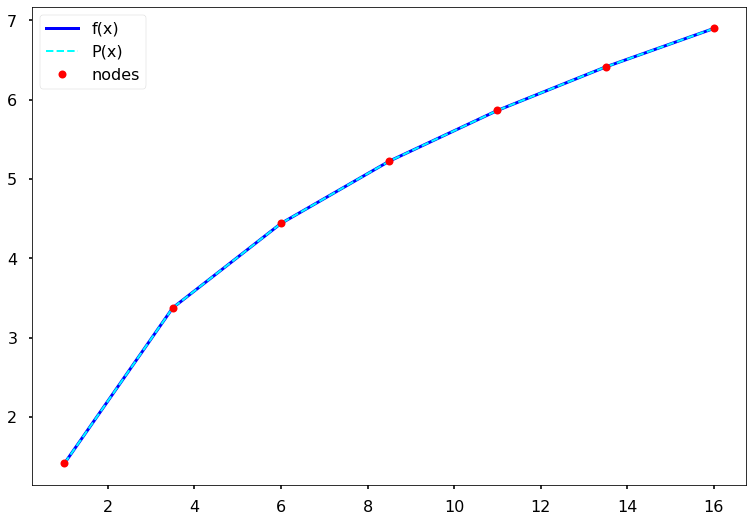

In [21]:
plt.plot(x, y, color='blue', label='f(x)', linewidth=3)
plt.plot(x, newtonxs, linestyle='dashed', color='cyan', linewidth=2, label='P(x)')
plt.plot(x, newtonxs, 'bo', markersize=8, color='red', label='nodes')
plt.rcParams['figure.figsize'] = (10, 10)
plt.legend();

In [22]:
xs = np.linspace(x_0, x_1, 50)
ys = f(xs)
newtonxs = [newton_interpolation(p, xs, ys) for p in xs]

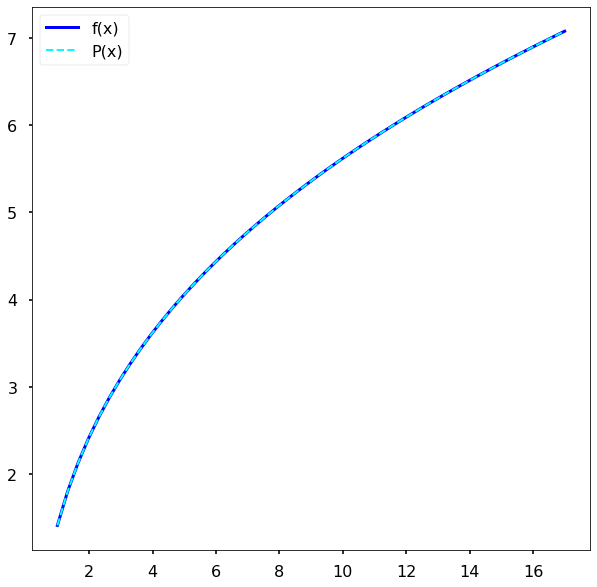

In [23]:
plt.plot(xs, ys, color='blue', label='f(x)', linewidth=3)
plt.plot(xs, newtonxs, linestyle='dashed', color='cyan', linewidth=2, label='P(x)')
plt.rcParams['figure.figsize'] = (10, 10)
plt.legend();